In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
#from __future__ import division
%matplotlib inline


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Functions for label processing

Function that takes input image and returns an image of the cropped label area.

In [3]:
def imshow(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [4]:
image_path = 'D:\\OneDrive - Georgia State University\\MSA\\Fall 2019\\MSA 8650 - Image and Text Analytics with Deep Neural Networks\\Assignments\\Assignment 1\\Data\\context\\'
from os import listdir
from os.path import isfile, join
data_list = [f for f in listdir(image_path) if isfile(join(image_path, f))]

In [34]:
# load the image
image = cv2.imread(image_path + data_list[1]) # read as grayscale
#img = cv2.resize(img, (1240, 960))
img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #convert to grey scale
img_height, img_width = img.shape[:2]
img_height, img_width

(600, 800)

In [35]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 25, 12

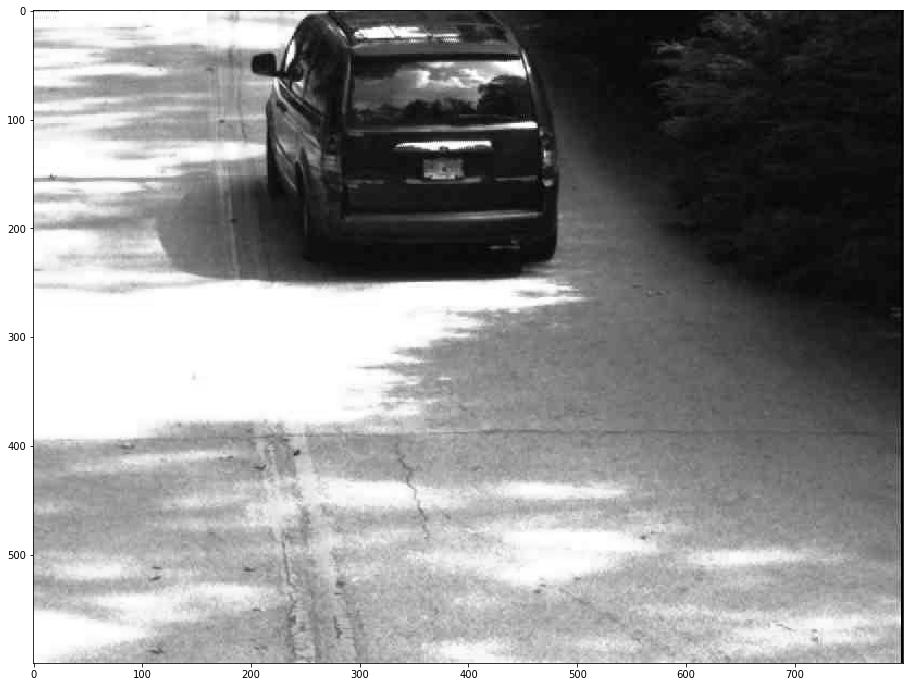

In [36]:
imshow(img)

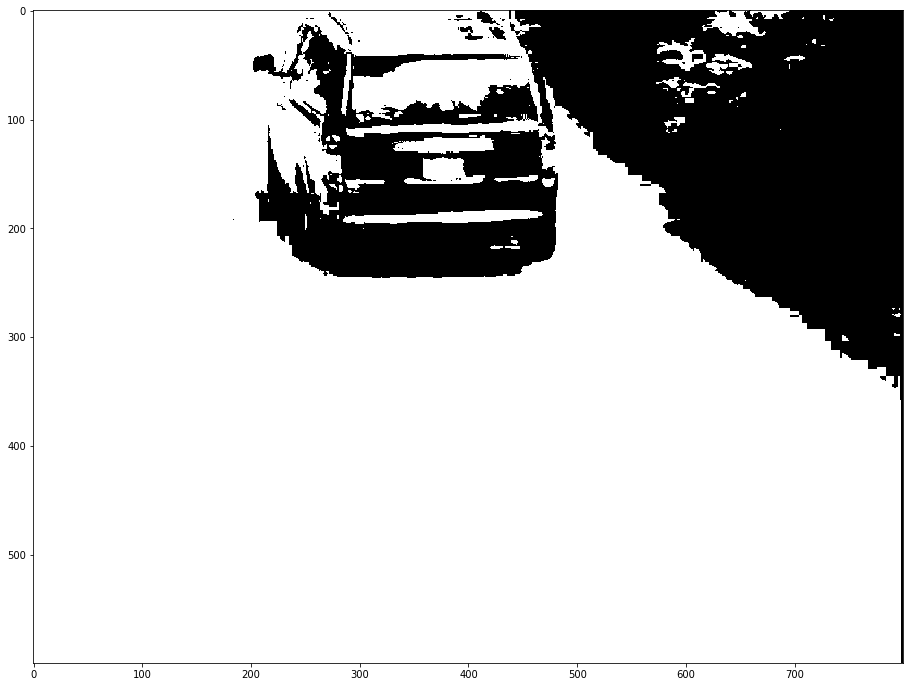

In [37]:
#thresh = cv2.inRange(img, 1, 1)
#thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 5, 5)
(_,thresh) = cv2.threshold(img, 35, 255,cv2.THRESH_BINARY)

plt.imshow(thresh, cmap='gray')

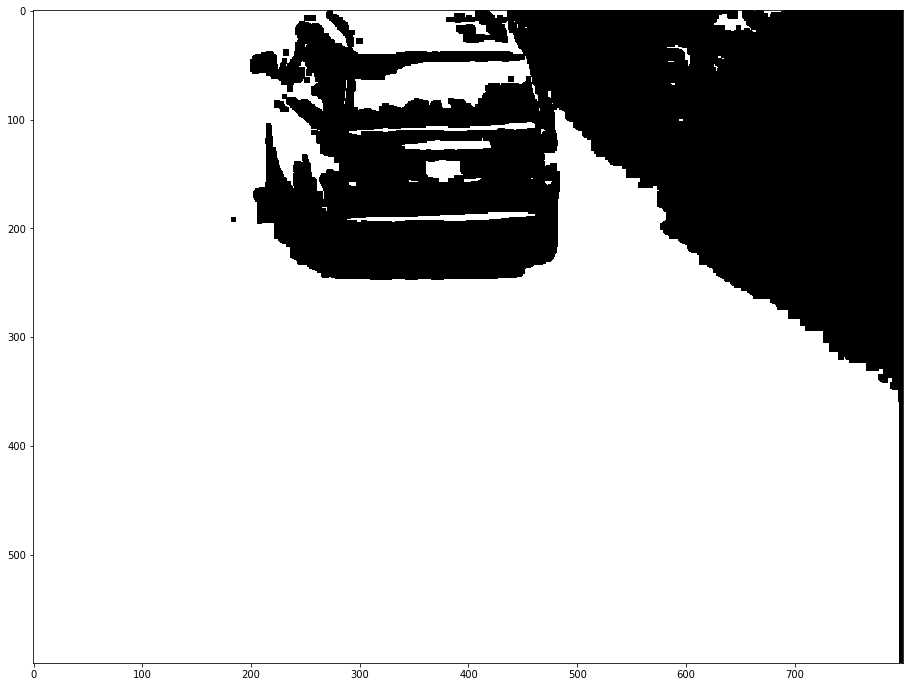

In [38]:
kernel_er = np.ones((5,5),np.uint8)
erode = cv2.erode(thresh.copy(), kernel_er)

plt.imshow(erode, cmap='gray')

9

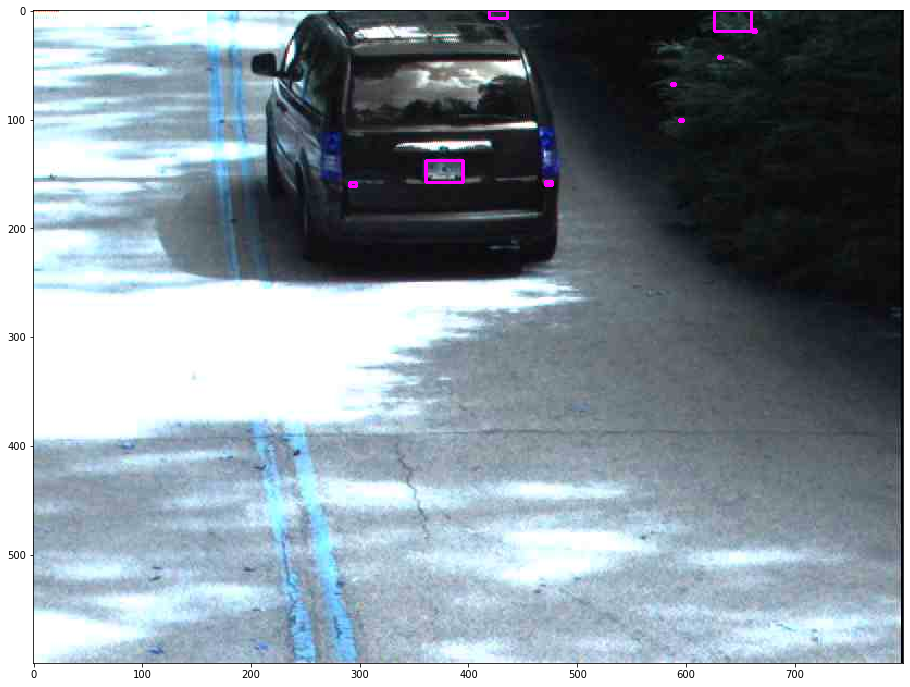

In [39]:
# find the contours of the thresholded image
(cnts, _) = cv2.findContours(erode, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
srt_cnts = sorted(cnts, key = cv2.contourArea, reverse = True) # reverse -- true for decending

# find the aspect ratio of each of the four largest contours to eliminate any with the wrong shape
# remove contour that is line (w or h is 1)
bestContour = []
for (i,c) in enumerate(srt_cnts):

    (x,y,w,h) = cv2.boundingRect(c)
    aspectRatio = w / float(h)
    if 1.5 <= aspectRatio <= 3 and w != 1 and h != 1:
        bestContour.append(srt_cnts[i])
        
    else:
        pass


len(bestContour)
#bestContour

copied = image.copy()

for contour in bestContour:
    # get rectangle bounding contour
    [x,y,w,h] = cv2.boundingRect(contour)

    # draw rectangle around contour on original image
    test = cv2.rectangle(copied,(x,y),(x+w,y+h),(255,0,255),2)
    
plt.imshow(test, cmap='gray')
    

# Chaallenge and Potential Solution:
    1) Plates and Back window distinguish -------> Contour Area
    2) Might have to approach White Car and Black Cars differently